In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from unidecode import unidecode

### Identificación de datos

In [3]:
df_historico = pd.read_csv('../Hackathon Sistecredito/Datasets/HistoricoContactCenter.csv')
df_historico

,Fecha_Inicio,Fecha_Fin,Duracion,Tema,Respuesta,Agente_ID
0,17/10/24 19:12,18/10/24 00:40,19726.026,NaN,NaN,NaN
1,17/10/24 19:24,18/10/24 00:27,18206.261,NaN,NaN,NaN
2,17/10/24 19:28,18/10/24 02:13,24272.567,NaN,NaN,NaN
3,17/10/24 19:29,18/10/24 00:00,16230.376,NaN,NaN,NaN
4,17/10/24 19:35,18/10/24 00:19,17057.885,NaN,NaN,NaN
...,...,...,...,...,...,...
1580382,31/10/24 23:54,1/11/24 03:55,14479.455,NaN,NaN,NaN
1580383,31/10/24 23:54,1/11/24 03:56,14497.750,NaN,NaN,NaN
1580384,31/10/24 23:56,1/11/24 00:57,3624.499,NaN,NaN,NaN
1580385,31/10/24 23:57,1/11/24 00:03,376.500,NaN,Isabot Fuera de Horario de Atención,NaN


In [4]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580387 entries, 0 to 1580386
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Fecha_Inicio  1580387 non-null  object 
 1   Fecha_Fin     1579103 non-null  object 
 2   Duracion      1579103 non-null  float64
 3   Tema          116851 non-null   object 
 4   Respuesta     138296 non-null   object 
 5   Agente_ID     116850 non-null   float64
dtypes: float64(2), object(4)
memory usage: 72.3+ MB


In [5]:
df_historico.isnull().sum()

Fecha_Inicio          0
Fecha_Fin          1284
Duracion           1284
Tema            1463536
Respuesta       1442091
Agente_ID       1463537
dtype: int64

### Manejo de Fechas

- Soporte en picos de demanda: Un chatbot puede atender el alto flujo de solicitudes en los días críticos (lunes, martes y miércoles) o horarios críticos (Medio día), evitando colapsos en el servicio
- Automatización en días bajos: Durante los días de menor actividad, el chatbot puede encargarse de atender las solicitudes sin necesidad de intervención humana
- Disponibilidad 24/7: Permitiría a los usuarios obtener respuestas inmediatas fuera del horario laboral o en fines de semana

In [6]:
df_historico['Fecha_Inicio'] = pd.to_datetime(df_historico['Fecha_Inicio'])
df_historico['Fecha_Fin'] = pd.to_datetime(df_historico['Fecha_Fin'])
df_historico.info()

/var/folders/ph/kk5ffp952hx0h94c23f3_n7r0000gn/T/ipykernel_42662/2717942960.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha_Inicio'] = pd.to_datetime(df_historico['Fecha_Inicio'])
/var/folders/ph/kk5ffp952hx0h94c23f3_n7r0000gn/T/ipykernel_42662/2717942960.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha_Fin'] = pd.to_datetime(df_historico['Fecha_Fin'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580387 entries, 0 to 1580386
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Fecha_Inicio  1580387 non-null  datetime64[ns]
 1   Fecha_Fin     1579103 non-null  datetime64[ns]
 2   Duracion      1579103 non-null  float64       
 3   Tema          116851 non-null   object        
 4   Respuesta     138296 non-null   object        
 5   Agente_ID     116850 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 72.3+ MB


In [7]:
# Llenar valores nulos
df_historico['Fecha_Fin'] = df_historico['Fecha_Fin'].fillna(method='ffill')
df_historico.isnull().sum()

/var/folders/ph/kk5ffp952hx0h94c23f3_n7r0000gn/T/ipykernel_42662/1675229421.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_historico['Fecha_Fin'] = df_historico['Fecha_Fin'].fillna(method='ffill')


Fecha_Inicio          0
Fecha_Fin             0
Duracion           1284
Tema            1463536
Respuesta       1442091
Agente_ID       1463537
dtype: int64

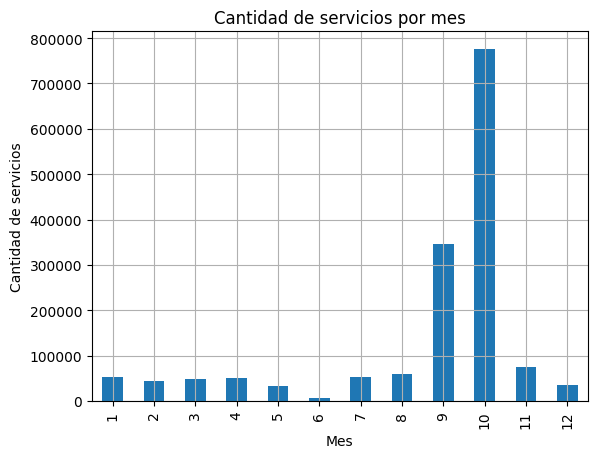

In [50]:
# Graficar la cantidad de servicios por mes
df_historico['Fecha_Inicio'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Cantidad de servicios por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de servicios')
plt.grid()
plt.show()

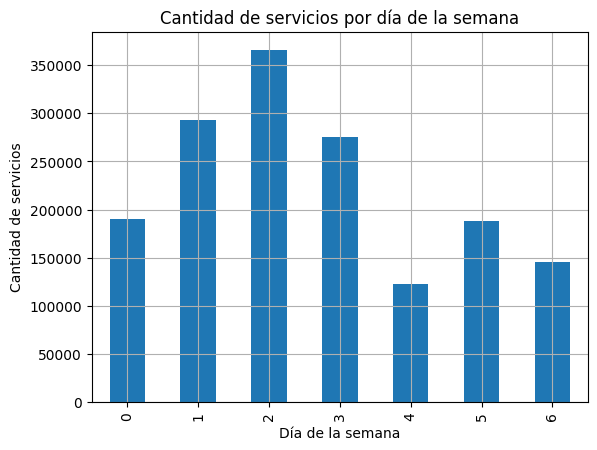

In [49]:
# Graficar la cantidad de servicios por día de la semana
df_historico['Fecha_Inicio'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.title('Cantidad de servicios por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de servicios')
plt.grid()
plt.show()

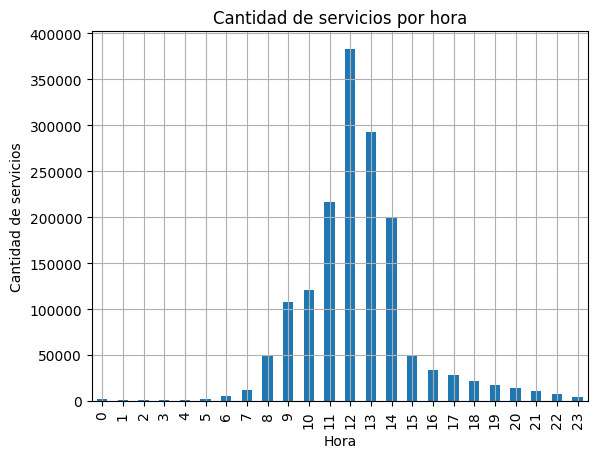

In [51]:
# Graficar la cantidad de servicios por hora
df_historico['Fecha_Inicio'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Cantidad de servicios por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de servicios')
plt.grid()
plt.show()

### Duración Servicio

In [31]:
df_historico['Duracion'] = pd.to_numeric(df_historico['Duracion'], errors='coerce') / 60
duracion = df_historico['Duracion'].dropna()

In [32]:
# Análisis estadístico duración
print('Media:', duracion.mean())
print('Mediana:', duracion.median())
print('Desviación estándar:', duracion.std())
print('Mínimo:', duracion.min())
print('Máximo:', duracion.max())

Media: 0.8131077766259278
Mediana: 1.1666666666666666e-05
Desviación estándar: 3.9310178219910132
Mínimo: 1.3888888888888887e-06
Máximo: 308.46030833333333


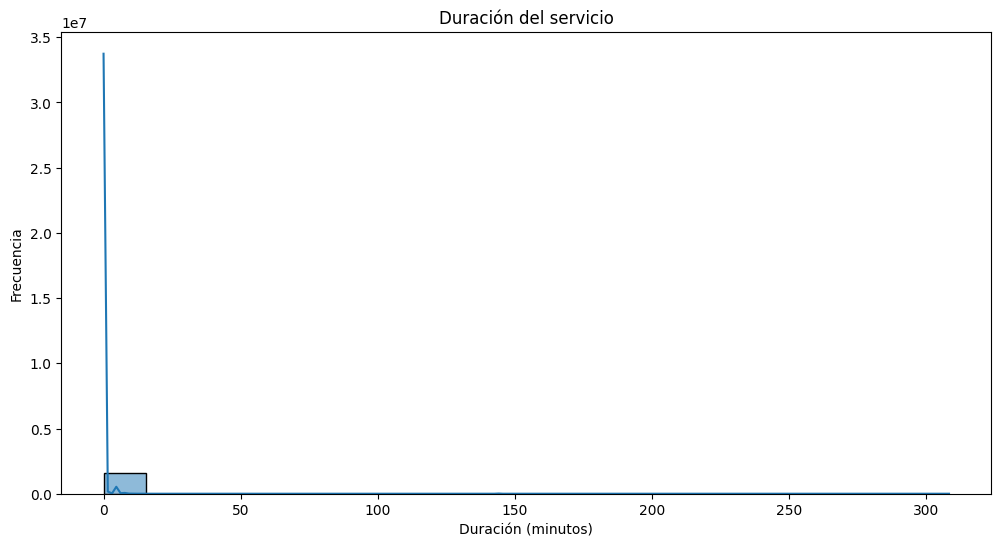

In [35]:
# Gráfico de duracion del servicio
plt.figure(figsize=(12, 6))
sns.histplot(duracion, bins=20, kde=True)
plt.title('Duración del servicio')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

### Mensajes de respuesta

- Se puede observar que hay una alta demanda fuera del horaro de atención, con más de 20.000 registros. Esto indica que hay una demanda significativa de usuarios intentando obtener información o resolver consultas cuando el servicio no está disponible
- Se observan consultas repetitivas y, en muchos casos, pueden ser resueltas sin intervención humana
- La categoría "ABANDONA SIN INFORMACIÓN" sugiere que hay clientes que inician la consulta pero no reciben la respuesta que necesitan

In [67]:
respuestas = df_historico['Respuesta'].dropna()
respuestas_limpias = respuestas.apply(lambda x: unidecode(x).lower())
respuestas

8          Otros; Información del compromiso de pago
9                                 Compromiso de pago
10                            Compromiso no generado
11                         Otros; Compromiso de pago
14                                    Medios de pago
                             ...                    
1580378          Isabot Fuera de Horario de Atención
1580380                   Finalizado por inactividad
1580381          Isabot Fuera de Horario de Atención
1580385          Isabot Fuera de Horario de Atención
1580386          Isabot Fuera de Horario de Atención
Name: Respuesta, Length: 138296, dtype: object

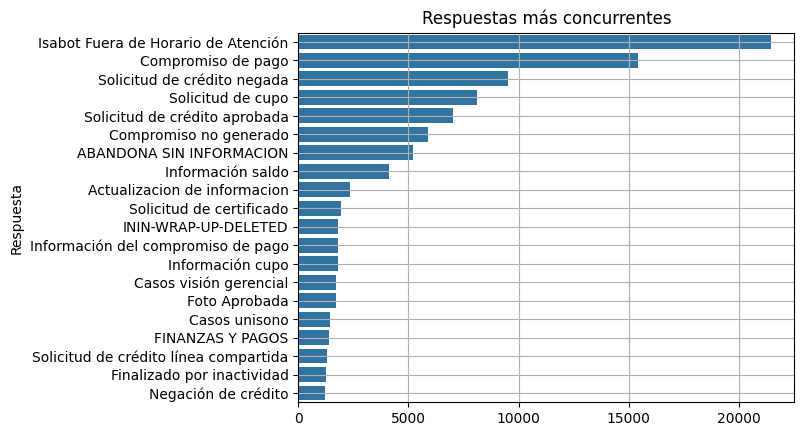

In [75]:
respuestas_mas_concurrentes = respuestas.value_counts().head(20)
plt.Figure(figsize=(10, 10))
sns.barplot(x=respuestas_mas_concurrentes.values, y=respuestas_mas_concurrentes.index)
plt.title('Respuestas más concurrentes')
plt.grid()
plt.show()

In [77]:
# Convertir a CSV
respuestas_csv = respuestas_limpias.value_counts().reset_index()
respuestas_csv.columns = ['Respuesta', 'Cantidad']
respuestas_csv['Respuesta'].to_csv('../Hackathon Sistecredito/Datasets/respuestas.csv', index=False)

### Temas de conversación

In [74]:
temas = df_historico['Tema'].dropna()
temas_limpios = temas.apply(lambda x: unidecode(x).lower())
temas

8          CHAT SERVICIO AL CLIENTE
9          CHAT SERVICIO AL CLIENTE
10         CHAT SERVICIO AL CLIENTE
11         CHAT SERVICIO AL CLIENTE
14         CHAT SERVICIO AL CLIENTE
                     ...           
1580282           COBRANZA WHATSAPP
1580308           COBRANZA WHATSAPP
1580319       Chat pendientes pines
1580328           COBRANZA WHATSAPP
1580380           COBRANZA WHATSAPP
Name: Tema, Length: 116851, dtype: object

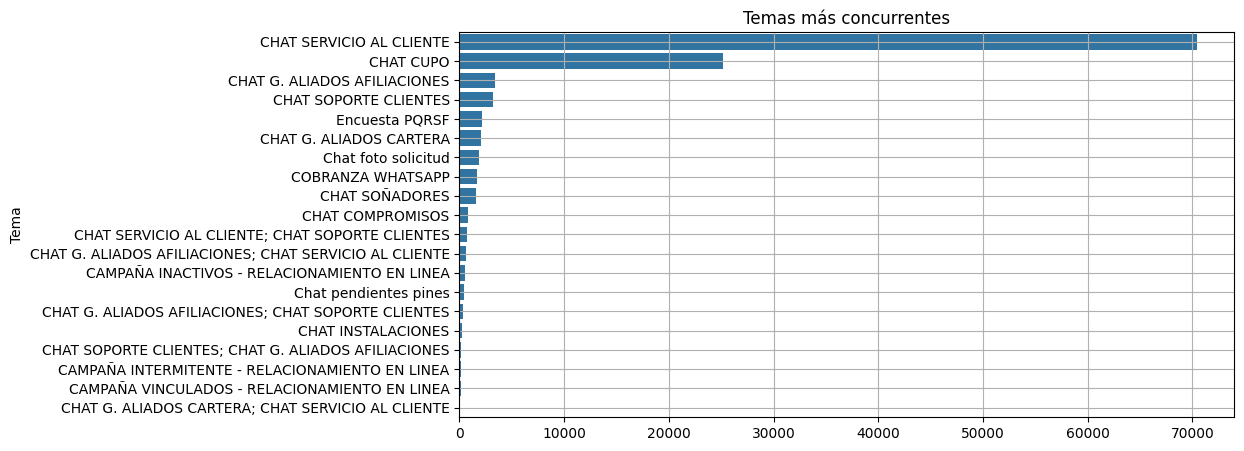

In [44]:
temas_mas_concurrentes = temas.value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=temas_mas_concurrentes.values, y=temas_mas_concurrentes.index)
plt.title('Temas más concurrentes')
plt.grid()
plt.show()

In [78]:
# Convertir a CSV los temas
temas_csv = temas_limpios.value_counts().reset_index()
temas_csv.columns = ['Tema', 'Cantidad']
temas_csv['Tema'].to_csv('../Hackathon Sistecredito/Datasets/temas.csv', index=False)

### Gráficas duración según respuesta

Aunque algunos tiempos parecen bajos en promedio, hay una gran dispersión (valores altos en la desviación estándar y máximos elevados). Esto indica que hay casos donde la atención es mucho más lenta. **La implementación del chatbot reduce la variabilidad en los tiempos de respuesta al proporcionar respuestas inmediatas y uniformes.**

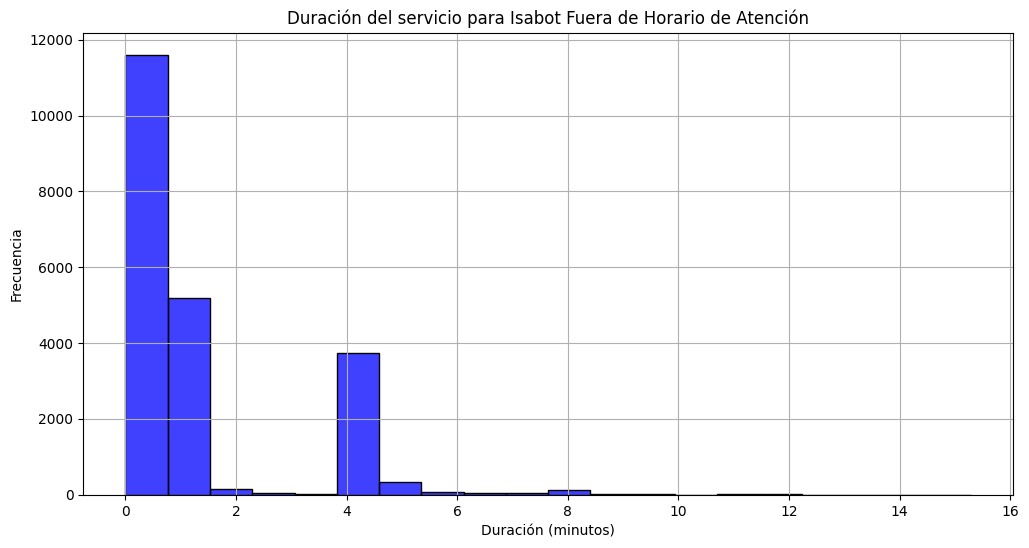

In [83]:
# Análisis estadístico de duracion del servicio segun respuesta
duracion_servicio_al_cliente = df_historico[df_historico['Respuesta'] == 'Isabot Fuera de Horario de Atención']['Duracion'].dropna()

# Grafico de duracion del servicio segun respuesta
plt.figure(figsize=(12, 6))
sns.histplot(duracion_servicio_al_cliente, bins=20, color='blue')
plt.title('Duración del servicio para Isabot Fuera de Horario de Atención')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

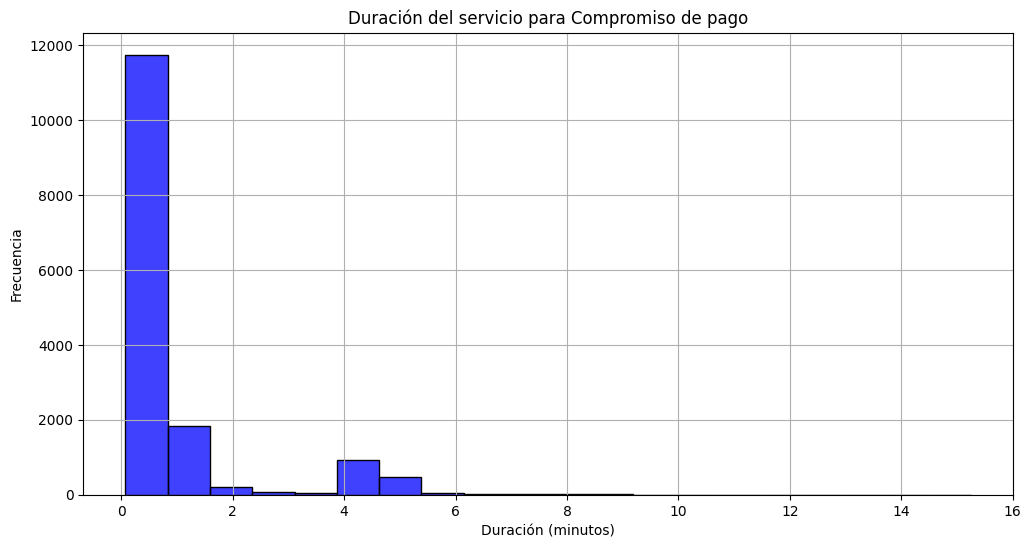

In [82]:
# Análisis estadístico de duracion del servicio segun respuesta
duracion_servicio_al_cliente = df_historico[df_historico['Respuesta'] == 'Compromiso de pago']['Duracion'].dropna()

# Grafico de duracion del servicio segun respuesta
plt.figure(figsize=(12, 6))
sns.histplot(duracion_servicio_al_cliente, bins=20, color='blue')
plt.title('Duración del servicio para Compromiso de pago')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

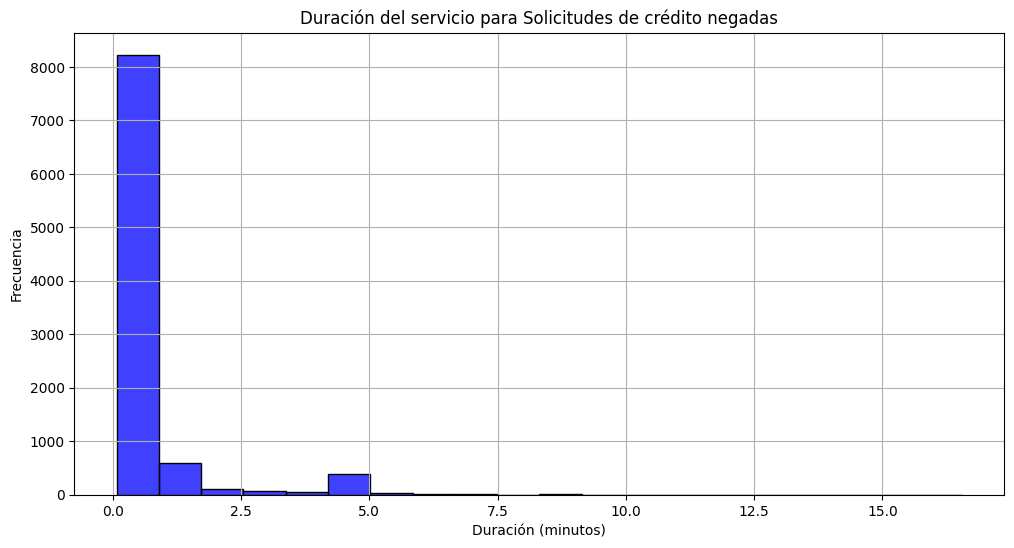

In [88]:
# Análisis estadístico de duracion del servicio segun respuesta
duracion_servicio_al_cliente = df_historico[df_historico['Respuesta'] == 'Solicitud de crédito negada']['Duracion'].dropna()

# Grafico de duracion del servicio segun respuesta
plt.figure(figsize=(12, 6))
sns.histplot(duracion_servicio_al_cliente, bins=20, color='blue')
plt.title('Duración del servicio para Solicitudes de crédito negadas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

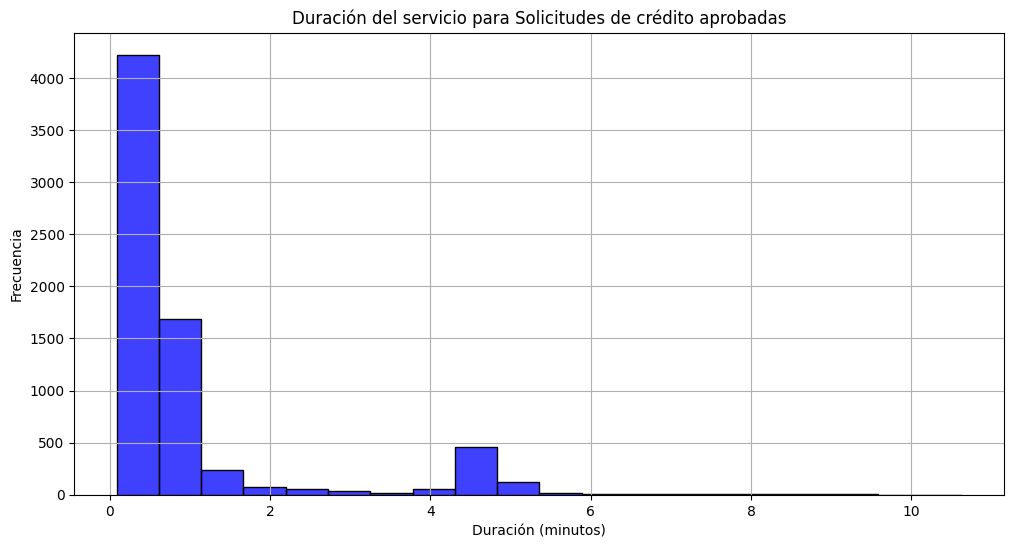

In [87]:
# Análisis estadístico de duracion del servicio segun respuesta
duracion_servicio_al_cliente = df_historico[df_historico['Respuesta'] == 'Solicitud de crédito aprobada']['Duracion'].dropna()

# Grafico de duracion del servicio segun respuesta
plt.figure(figsize=(12, 6))
sns.histplot(duracion_servicio_al_cliente, bins=20, color='blue')
plt.title('Duración del servicio para Solicitudes de crédito aprobadas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

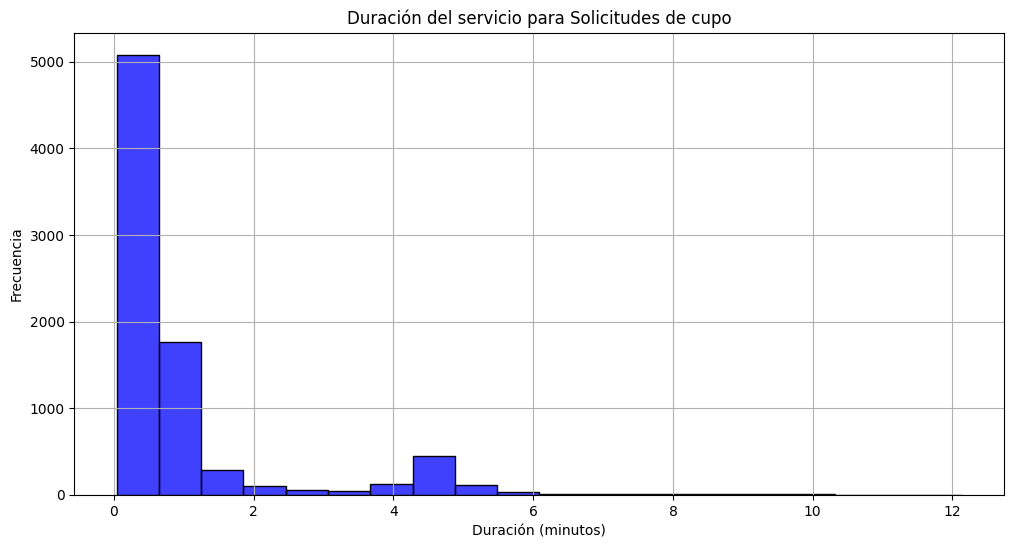

In [89]:
# Análisis estadístico de duracion del servicio segun respuesta
duracion_servicio_al_cliente = df_historico[df_historico['Respuesta'] == 'Solicitud de cupo']['Duracion'].dropna()

# Grafico de duracion del servicio segun respuesta
plt.figure(figsize=(12, 6))
sns.histplot(duracion_servicio_al_cliente, bins=20, color='blue')
plt.title('Duración del servicio para Solicitudes de cupo')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

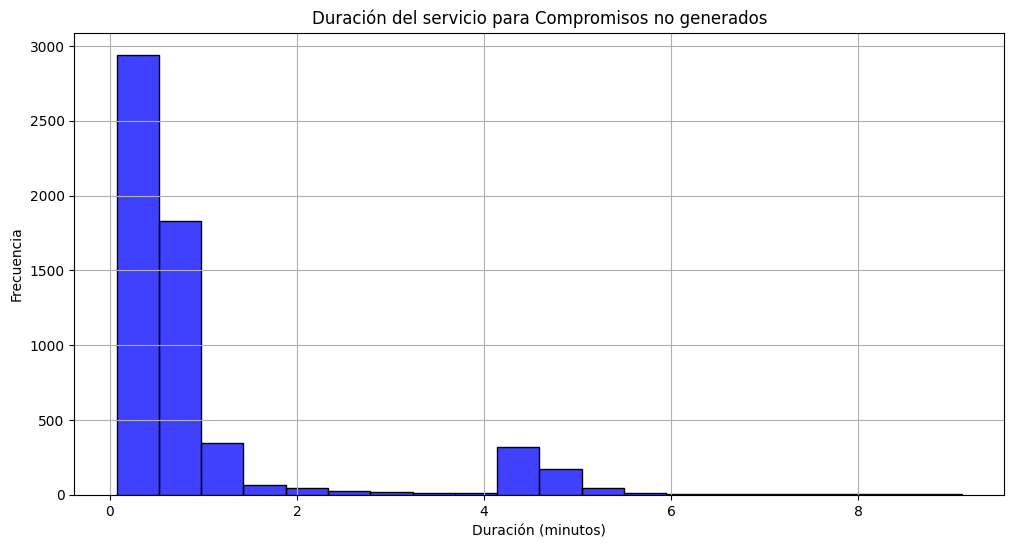

In [91]:
# Análisis estadístico de duracion del servicio segun respuesta
duracion_servicio_al_cliente = df_historico[df_historico['Respuesta'] == 'Compromiso no generado']['Duracion'].dropna()

# Grafico de duracion del servicio segun respuesta
plt.figure(figsize=(12, 6))
sns.histplot(duracion_servicio_al_cliente, bins=20, color='blue')
plt.title('Duración del servicio para Compromisos no generados')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()